#  Unemployment Analysis using Python (Task 2)

In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import datetime as dt
import calendar

**Reading CSV File From Drive**

In [127]:
df = pd.read_csv("Unemployment in India.csv")
df_2020 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# **Cleaning Data**

In [128]:
df.head(6)
df_2020.head(6)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74


In [129]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [131]:
df.infer_objects()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [133]:
df.shape

(768, 7)

In [134]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Renaming Some Column Name

In [136]:
df.rename(columns={'Region':'States','Region.1':'Region'},inplace=True)

In [137]:
df_2020.rename(columns={'Region':'States','Region.1':'Region'},inplace=True)

In [138]:
df.columns

Index(['States', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [139]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [141]:
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,12.0,11.0,0.0,5.0,8.0,16.0,77.0
Estimated Employed,740.0,7204460.0,8087988.0,49420.0,1190404.0,4744178.0,11275490.0,45777509.0
Estimated Labour Participation Rate (%),740.0,43.0,8.0,13.0,38.0,41.0,46.0,73.0


In [142]:
round(df_2020.describe().T)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,12.0,11.0,0.0,5.0,10.0,17.0,76.0
Estimated Employed,267.0,13962106.0,13366318.0,117542.0,2838930.0,9732417.0,21878686.0,59433759.0
Estimated Labour Participation Rate (%),267.0,42.0,8.0,17.0,37.0,40.0,44.0,70.0
longitude,267.0,23.0,6.0,11.0,18.0,24.0,27.0,34.0
latitude,267.0,81.0,6.0,71.0,76.0,79.0,85.0,93.0


# Checking data has null values or not

In [143]:
df.isnull().sum()

States                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [144]:
df_2020.isnull().sum()

States                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region                                      0
longitude                                   0
latitude                                    0
dtype: int64

# Checking the NA or missing Values from Both data sets

In [145]:
df.isna().sum()

States                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [146]:
df_2020.isna().sum()

States                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region                                      0
longitude                                   0
latitude                                    0
dtype: int64

# Drop The Null Values

In [147]:
df = df.dropna()

In [148]:
df.isna().sum()

States                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

# **States with Unemployement Upto 2020**

In [149]:
df["States"].value_counts()

States
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

- **Highest Employement Rate upto 2020**

In [150]:
df["States"].value_counts().idxmax()

'Andhra Pradesh'

- **Lowest Employement Rate upto 2020**

In [151]:
df["States"].value_counts().idxmin()

'Chandigarh'

## **Unemployement Rate Upto 2011 (State wise)**

- **Highest Imployement Rate**

In [152]:
df_2020["States"].value_counts().idxmax()

'Andhra Pradesh'

- **Lowest Imployement Rate**

In [153]:
df_2020["States"].value_counts().idxmin()

'Sikkim'

In [154]:
df.columns

Index(['States', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

**Top 10 States With Highest Unemployement**

In [155]:
df_Est = df[["States"," Estimated Unemployment Rate (%)"]].groupby("States").sum().sort_values(' Estimated Unemployment Rate (%)',ascending = False)

In [156]:
df_Est

,Estimated Unemployment Rate (%)
States,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [157]:
df_Est_2011 = df_2020[["States"," Estimated Unemployment Rate (%)"]].groupby("States").sum().sort_values(' Estimated Unemployment Rate (%)',ascending = False)

In [158]:
df_Est_2011

,Estimated Unemployment Rate (%)
States,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


# Highest to Lowest Employement Rate with Visualisation

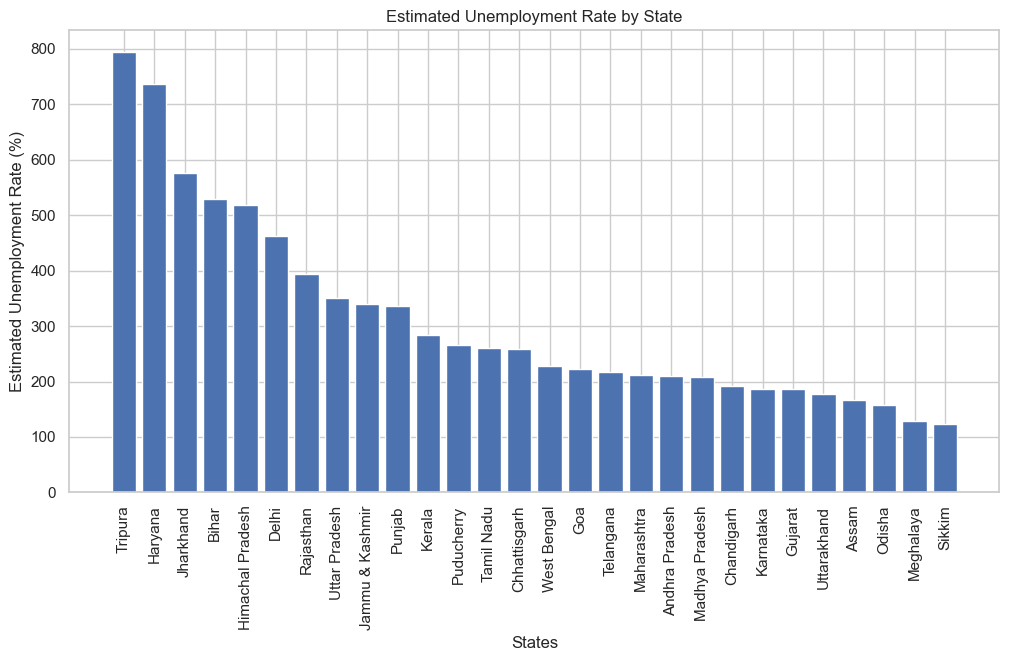

In [159]:
import matplotlib.pyplot as plt

# Extract the states and unemployment rates from the DataFrame
states = df_Est.index
unemployment_rates = df_Est[' Estimated Unemployment Rate (%)']

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(states, unemployment_rates)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by State')

# Display the plot
plt.show()

# According to 2011 data

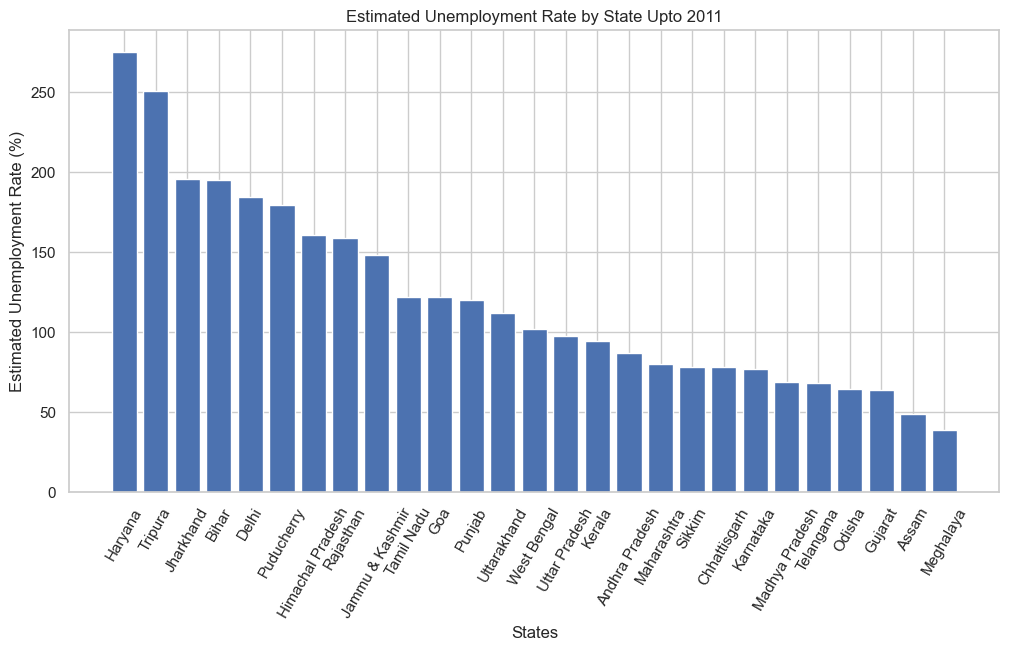

In [160]:
import matplotlib.pyplot as plt

# Extract the states and unemployment rates from the DataFrame
states = df_Est_2011.index
unemployment_rates = df_Est_2011[' Estimated Unemployment Rate (%)']

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(states, unemployment_rates)
plt.xticks(rotation=60)
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by State Upto 2011')

# Display the plot
plt.show()

# Region Wise Estimated Unemployment Rate (%)

In [161]:
df_2020.columns

Index(['States', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude'],
      dtype='object')

In [162]:
df_Est_area2 = df_2020[["Region"," Estimated Unemployment Rate (%)"]].groupby("Region").sum().sort_values(' Estimated Unemployment Rate (%)',ascending = False)

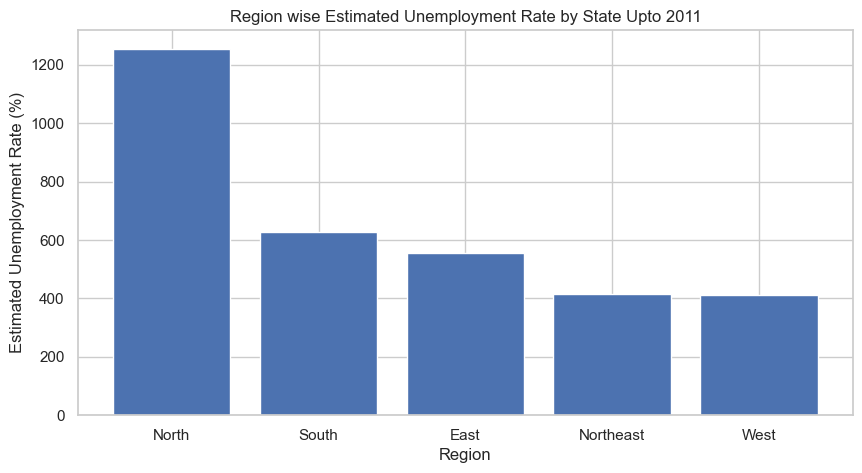

In [163]:
import matplotlib.pyplot as plt

# Extract the states and unemployment rates from the DataFrame
states = df_Est_area2.index
unemployment_rates = df_Est_area2[' Estimated Unemployment Rate (%)']

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(states, unemployment_rates)
plt.xticks(rotation=0)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Region wise Estimated Unemployment Rate by State Upto 2011')

# Display the plot
plt.show()

# Area wise Estimated Unemployement Rate %

In [164]:
df_Est_area = df[["Area"," Estimated Unemployment Rate (%)"]].groupby("Area").sum().sort_values(' Estimated Unemployment Rate (%)',ascending = False)

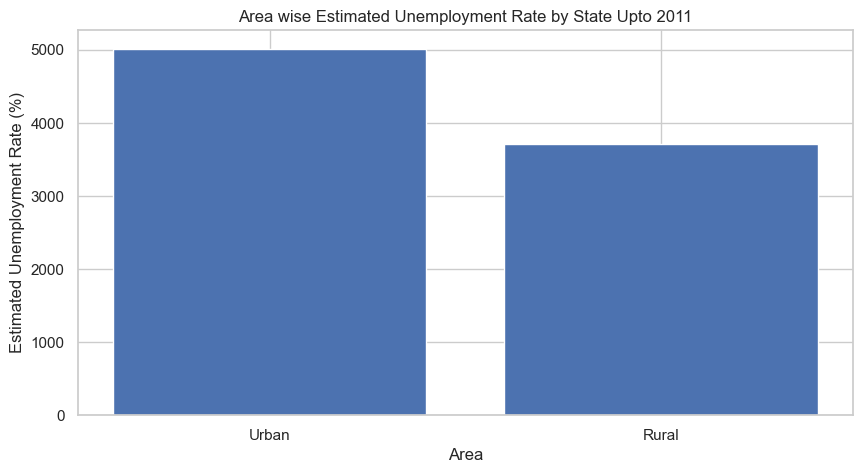

In [165]:
import matplotlib.pyplot as plt

# Extract the states and unemployment rates from the DataFrame
states = df_Est_area.index
unemployment_rates = df_Est_area[' Estimated Unemployment Rate (%)']

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(states, unemployment_rates)
plt.xticks(rotation=0)
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Area wise Estimated Unemployment Rate by State Upto 2011')

# Display the plot
plt.show()

In [166]:
df.head(10)

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


**Labor Participation Rate in Andhra Pradesh (Rural)**

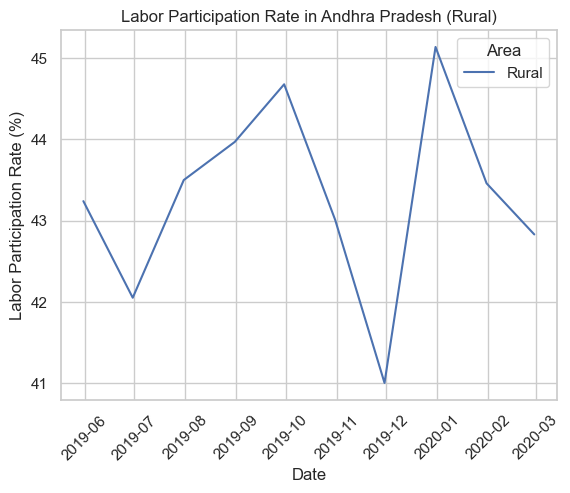

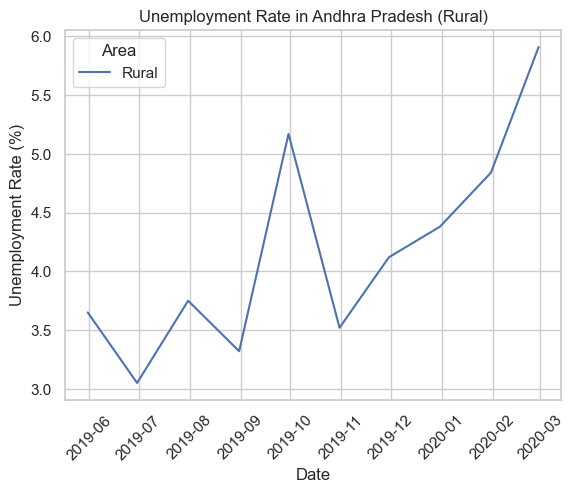

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided data
data = {
    'States': ['Andhra Pradesh'] * 10,
    'Date': ['31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019', '30-09-2019',
             '31-10-2019', '30-11-2019', '31-12-2019', '31-01-2020', '29-02-2020'],
    'Estimated Unemployment Rate (%)': [3.65, 3.05, 3.75, 3.32, 5.17, 3.52, 4.12, 4.38, 4.84, 5.91],
    'Estimated Labour Participation Rate (%)': [43.24, 42.05, 43.50, 43.97, 44.68, 43.01, 41.00, 45.14, 43.46, 42.83],
    'Area': ['Rural'] * 10
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Plot the labor participation rate
sns.lineplot(data=df, x='Date', y='Estimated Labour Participation Rate (%)', hue='Area')
plt.title('Labor Participation Rate in Andhra Pradesh (Rural)')
plt.xlabel('Date')
plt.ylabel('Labor Participation Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot the unemployment rate
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title('Unemployment Rate in Andhra Pradesh (Rural)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [168]:
import plotly.express as px

# Filter the data for a specific state (e.g., Andhra Pradesh)
state_data = df[df['States'] == 'Andhra Pradesh']

# Create an interactive line plot using Plotly
fig = px.line(state_data, x='Date', y=['Estimated Labour Participation Rate (%)', 'Estimated Unemployment Rate (%)'], 
              title='Labor Participation Rate and Unemployment Rate in Andhra Pradesh')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Rate (%)',
    legend_title='Rate Type',
    hovermode='x'
)

# Show the interactive plot
fig.show()


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   States                                   10 non-null     object        
 1   Date                                     10 non-null     datetime64[ns]
 2   Estimated Unemployment Rate (%)          10 non-null     float64       
 3   Estimated Labour Participation Rate (%)  10 non-null     float64       
 4   Area                                     10 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 532.0+ bytes


In [170]:
import seaborn as sns
import mpld3
import matplotlib.pyplot as plt

# Extract the labor participation rate and unemployment rate from the DataFrame
labor_participation_rate = df['Estimated Labour Participation Rate (%)']
unemployment_rate = df['Estimated Unemployment Rate (%)']

# Create an interactive scatter plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=labor_participation_rate, y=unemployment_rate, hue=df['States'], s=100)
scatter.set(xlabel='Estimated Labor Participation Rate (%)', ylabel='Estimated Unemployment Rate (%)')
plt.title('Labor Participation Rate vs. Unemployment Rate')

# Add interactive tooltip with state names
tooltip = mpld3.plugins.PointLabelTooltip(scatter.get_children()[0])
mpld3.plugins.connect(plt.gcf(), tooltip)

# Show the interactive plot
mpld3.display()


In [171]:
df_2020.columns

Index(['States', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude'],
      dtype='object')

# State Wise Employed Data

In [172]:
df_2020.tail()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [173]:
df_2020_emp = df_2020[['States',' Estimated Employed']].groupby('States').sum().sort_values(' Estimated Employed',ascending=False)

In [174]:
df_2020_emp

,Estimated Employed
States,
Uttar Pradesh,555247990
Maharashtra,392047582
West Bengal,333051643
Bihar,236068280
Gujarat,227307461
Madhya Pradesh,223183353
Tamil Nadu,219878981
Karnataka,216240176
Rajasthan,197317522


Text(0, 0.5, 'Number Of employed People')

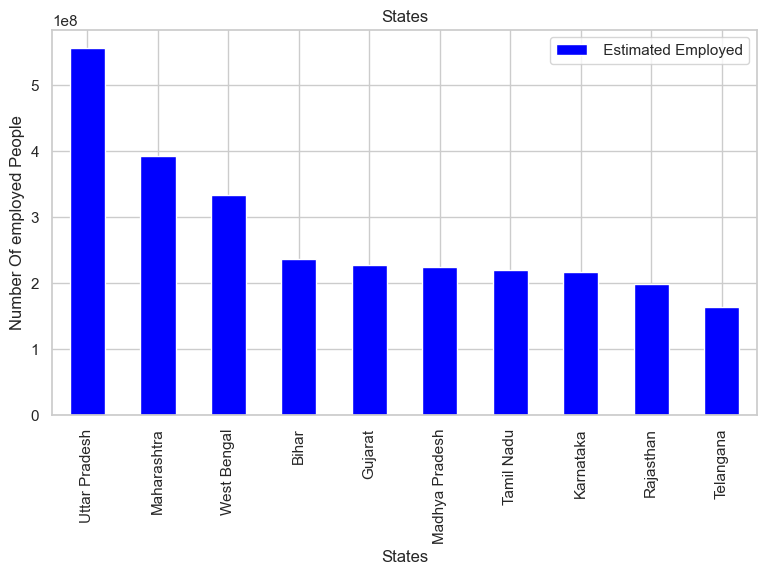

In [195]:
df_2020_1 = df_2020[['States', ' Estimated Employed']].groupby('States').sum().sort_values(' Estimated Employed', ascending=False)
fig = plt.figure()
Axis_0 = fig.add_subplot(1, 2, 1)

# Employeed

df_2020_1[:10].plot(kind='bar', color='blue', figsize=(20, 5), ax=Axis_0)
Axis_0.set_title('Estimated Emplpoyement people in each state')
Axis_0.set_title('States')
Axis_0.set_ylabel('Number Of employed People')
